## Ref 

- https://www.kaggle.com/c/bike-sharing-demand

- https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

## Columns :
> - datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    - 3: Light Snow, Light Rain + Thunderstorm + 
         Scattered clouds, Light Rain + Scattered clouds 
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [106]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

#import missingno as msno

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load CSVs

df_train = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/train.csv')
df_test = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/test.csv')
sampleSubmission = pd.read_csv('~/Kaggle.com_mini_project/bike_sharing/samplesubmit.csv')

In [9]:
df_train.shape

(10886, 12)

In [4]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


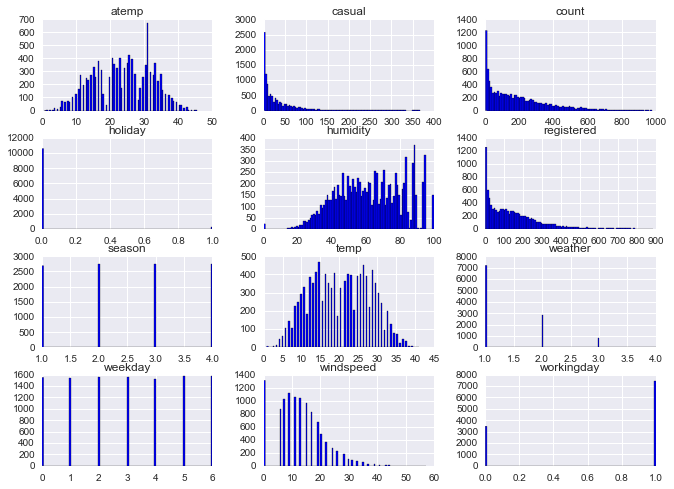

In [138]:
# histagram on train data 

df_train.hist(bins=100, figsize=(11,8),color='blue')
plt.show()

In [23]:
#df_train.temp.value_counts()

## 0) Feature Extract

In [99]:
#df_train.head(3)

In [96]:
# help functions 

def get_date(x):
    return x.split(" ")[0]

def get_year(x):
    return x.split(" ")[0].split("-")[0]

def get_month(x):
    return x.split(" ")[0].split("-")[1]

def get_weekday(x):
    # DatetimeIndex.weekday
    # The day of the week with Monday=0, Sunday=6
    # mon. = 0, tue.=1, wed.=2, thurs. = 3 , fri. = 4, sat. =5 , sun. = 6 
    return pd.to_datetime(x.split(" ")[0]).weekday()

def get_time(x):
    return x.split(" ")[1]

def get_hour(x):
    return x.split(" ")[1].split(":")[0]

#def get_season(x):
#    return x.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

In [134]:
# get features extracted

df_train['date'] = df_train['datetime'].apply(lambda x :get_date(x)  )
df_train['time'] = df_train['datetime'].apply(lambda x :get_time(x)  )
df_train['hour'] = df_train['datetime'].apply(lambda x :get_hour(x)  )
df_train['year'] = df_train['datetime'].apply(lambda x :get_year(x)  )
df_train['month'] = df_train['datetime'].apply(lambda x :get_month(x)  )
df_train['weekday'] = df_train['datetime'].apply(lambda x :get_weekday(x)  )
df_train['season_'] = df_train['season'].map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })


In [137]:
df_train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,hour,weekday,season_,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,00,5,Spring,2011,01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,01,5,Spring,2011,01


## 1) Check Data Quality 

In [139]:
# histagram on train data 

df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'time', 'hour', 'weekday', 'season_', 'year', 'month'],
      dtype='object')

In [150]:
#fig, axes = plt.subplots(nrows=1,ncols=1)
#fig.set_size_inches(12, 10)
#sns.boxplot(data=df_train,y="count",x="weekday",orient="v")

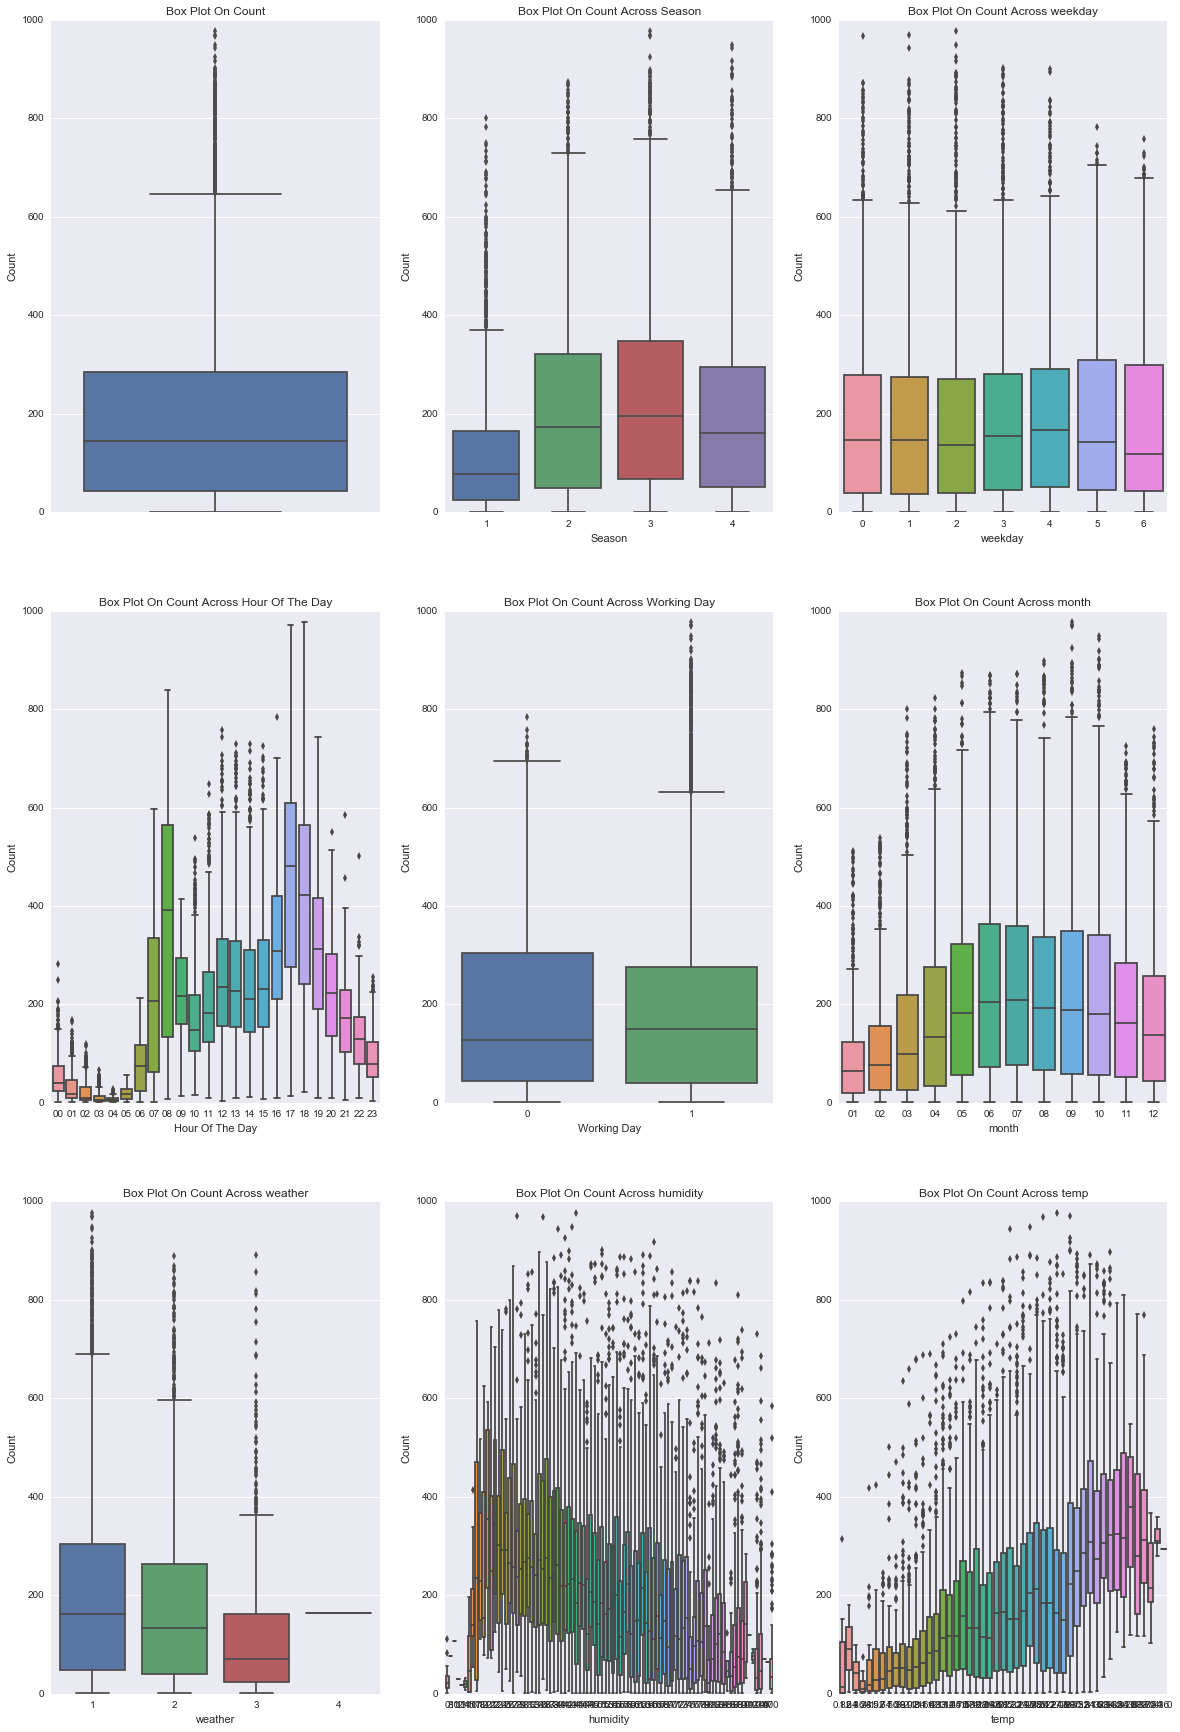

In [154]:
# boxplot on counts VS features 

fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(20, 30)
sns.boxplot(data=df_train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df_train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df_train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df_train,y="count",x="workingday",orient="v",ax=axes[1][1])

sns.boxplot(data=df_train,y="count",x="weekday",orient="v" ,ax=axes[0][2])
sns.boxplot(data=df_train,y="count",x="month",orient="v" ,ax=axes[1][2])
sns.boxplot(data=df_train,y="count",x="weather",orient="v" ,ax=axes[2][0])
sns.boxplot(data=df_train,y="count",x="humidity",orient="v" ,ax=axes[2][1])
#sns.boxplot(data=df_train,y="count",x="atemp",orient="v" ,ax=axes[2][1])
sns.boxplot(data=df_train,y="count",x="temp",orient="v" ,ax=axes[2][2])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

axes[0][2].set(xlabel='weekday', ylabel='Count',title="Box Plot On Count Across weekday")
axes[1][2].set(xlabel='month', ylabel='Count',title="Box Plot On Count Across month")
axes[2][0].set(xlabel='weather', ylabel='Count',title="Box Plot On Count Across weather")
axes[2][1].set(xlabel='humidity', ylabel='Count',title="Box Plot On Count Across humidity")
#axes[2][1].set(xlabel='atemp', ylabel='Count',title="Box Plot On Count Across atemp")
axes[2][2].set(xlabel='temp', ylabel='Count',title="Box Plot On Count Across temp")
